In [1]:
# Import necessary modules
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Open pickled dataframe
df = pickle.load(open("data/electric_guitar_dataframe.pkl", "rb"))

In [3]:
# Schema
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31390 entries, 0 to 33881
Data columns (total 6 columns):
Final          31390 non-null float64
Asking         31390 non-null float64
Model Year     31390 non-null float64
Brand          31390 non-null object
Condition      31390 non-null object
Model Color    31390 non-null object
dtypes: float64(3), object(3)
memory usage: 1.7+ MB


In [4]:
# Creating variable transformations to explore
df['log_Final'] = np.log10(df['Final'])
df['log_Asking'] = np.log10(df['Asking'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31390 entries, 0 to 33881
Data columns (total 8 columns):
Final          31390 non-null float64
Asking         31390 non-null float64
Model Year     31390 non-null float64
Brand          31390 non-null object
Condition      31390 non-null object
Model Color    31390 non-null object
log_Final      31390 non-null float64
log_Asking     31390 non-null float64
dtypes: float64(5), object(3)
memory usage: 2.2+ MB


# Final Price (y) Visualizations

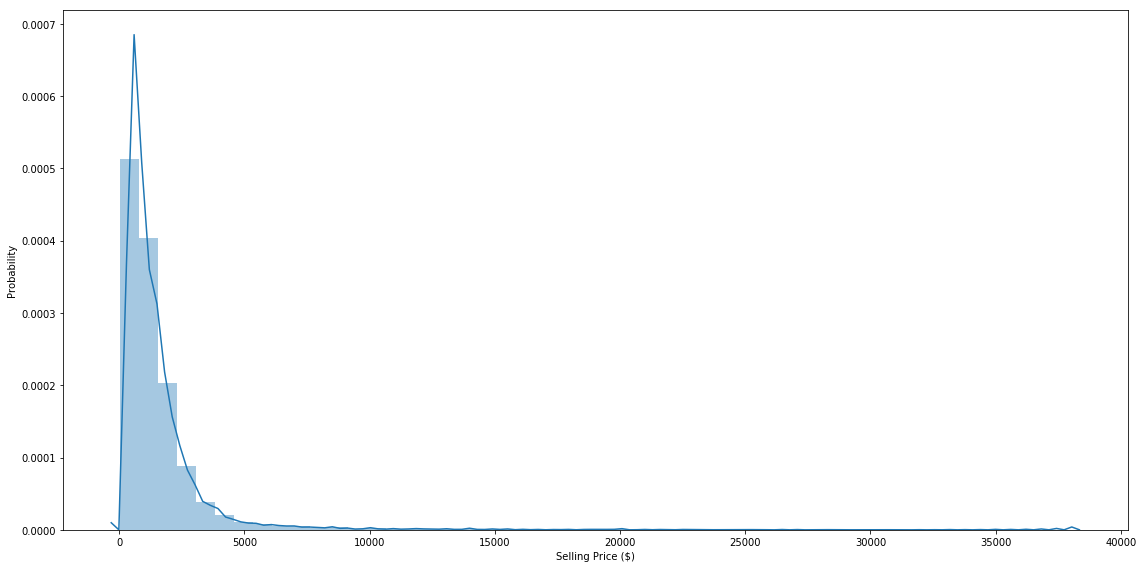

In [5]:
# Distribution of final price
dims = (16.0,8.0)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df['Final'], ax = ax)
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.xlabel('Selling Price ($)')
plt.ylabel('Probability')
plt.tight_layout()
#plt.savefig('Selling Price Distribution.png')
plt.show()

# Asking Price (x) Visualizations

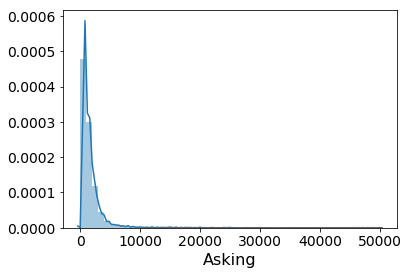

In [6]:
# Distribution of asking price
sns.distplot(df['Asking'])
plt.show()

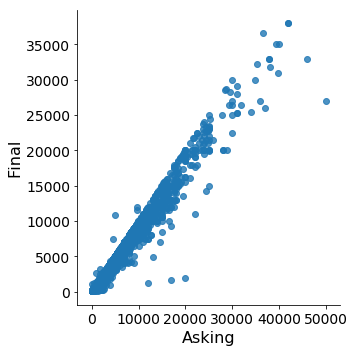

In [7]:
# Final selling price vs. asking price
sns.lmplot(x = 'Asking', y = 'Final', data = df, fit_reg = False)
plt.show()

# Model Year (x) Visualizations

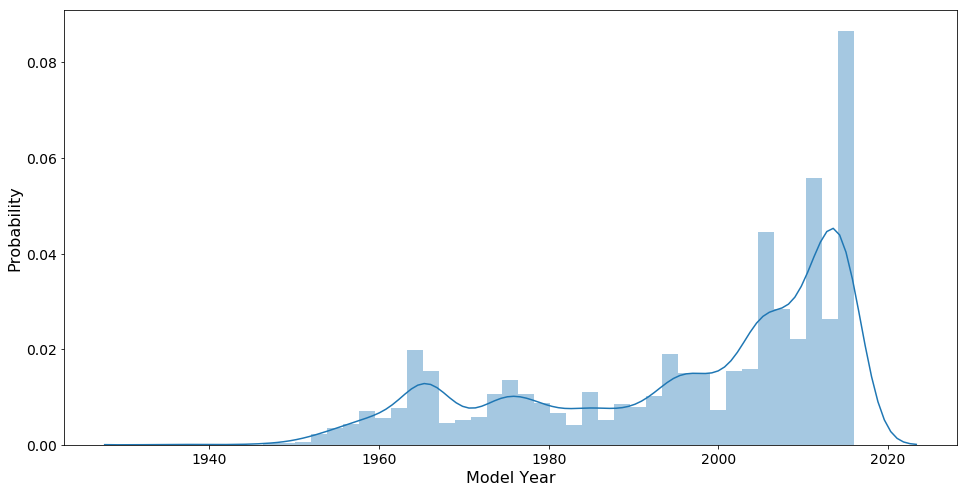

In [8]:
# Model Year histogram
dims = (16.0,8.0)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df['Model Year'], ax = ax)
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.xlabel('Model Year')
plt.ylabel('Probability')
#plt.savefig('Model Year Distribution.png')
plt.show()

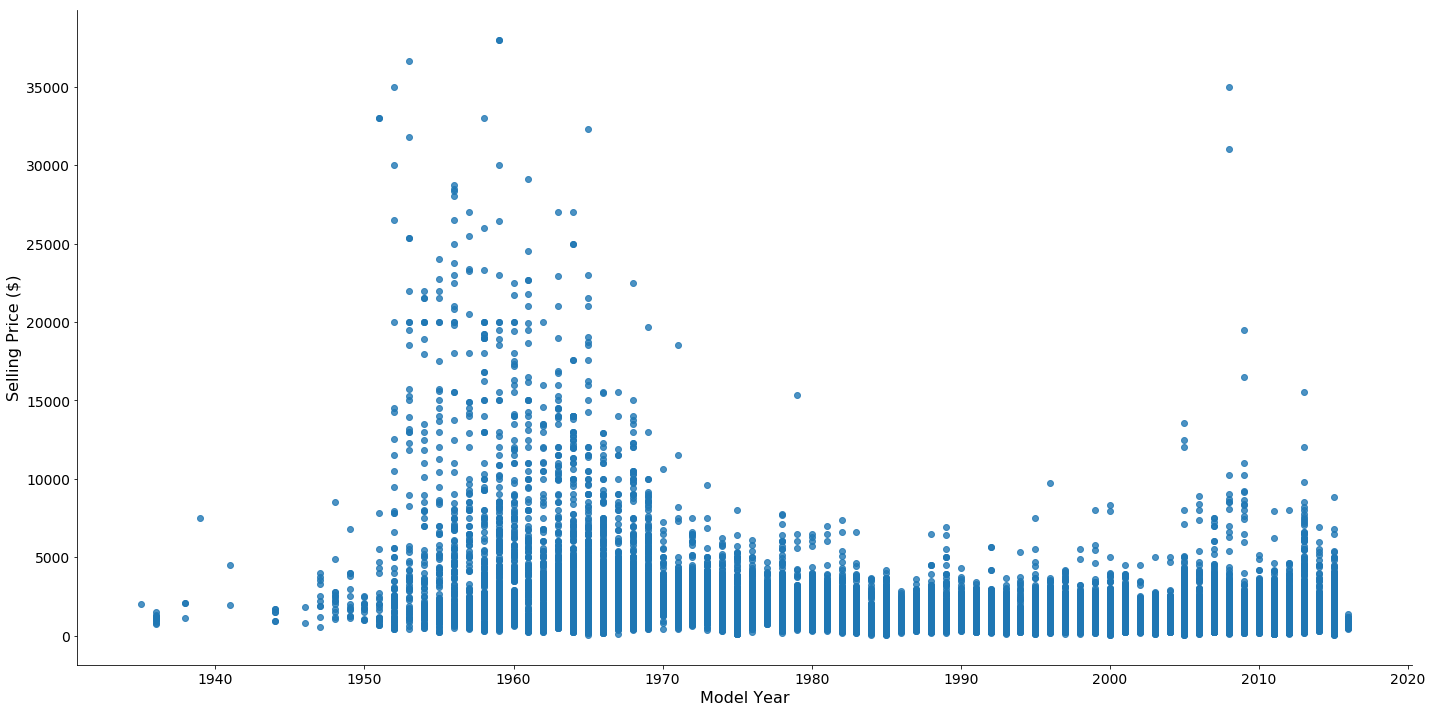

In [9]:
# Selling price vs. Model Year
sns.lmplot(x = 'Model Year', y = 'Final', data = df, fit_reg = False, size = 10, aspect = 2)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18
plt.xlabel('Model Year')
plt.ylabel('Selling Price ($)')
#plt.savefig('Selling Price vs. Model Year.png')
plt.show()

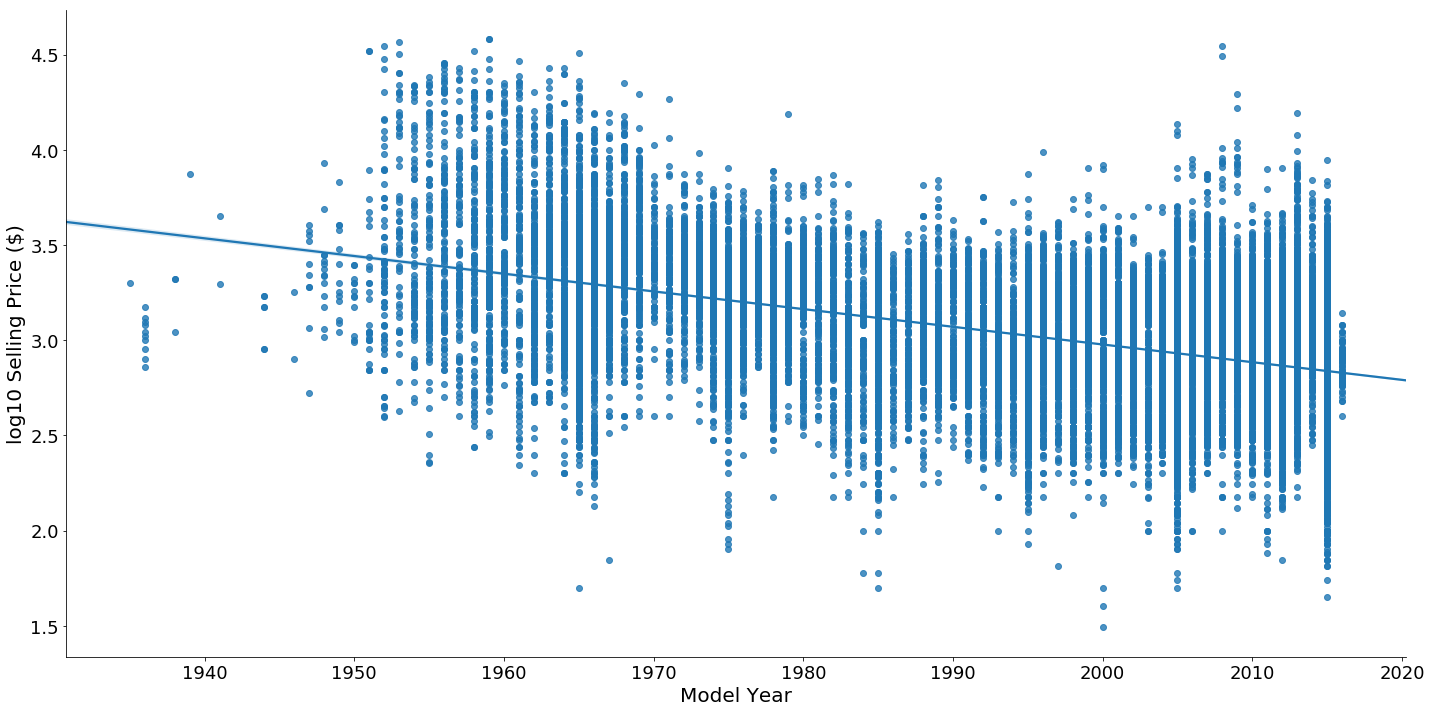

In [10]:
# log10(selling price) vs. Model Year
sns.lmplot(x = 'Model Year', y = 'log_Final', data = df, fit_reg = True, size = 10, aspect = 2)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18
plt.xlabel('Model Year')
plt.ylabel('log10 Selling Price ($)')
#plt.savefig('log10(Selling Price) vs. Model Year.png')
plt.show()

# Brand (x) Visualizations

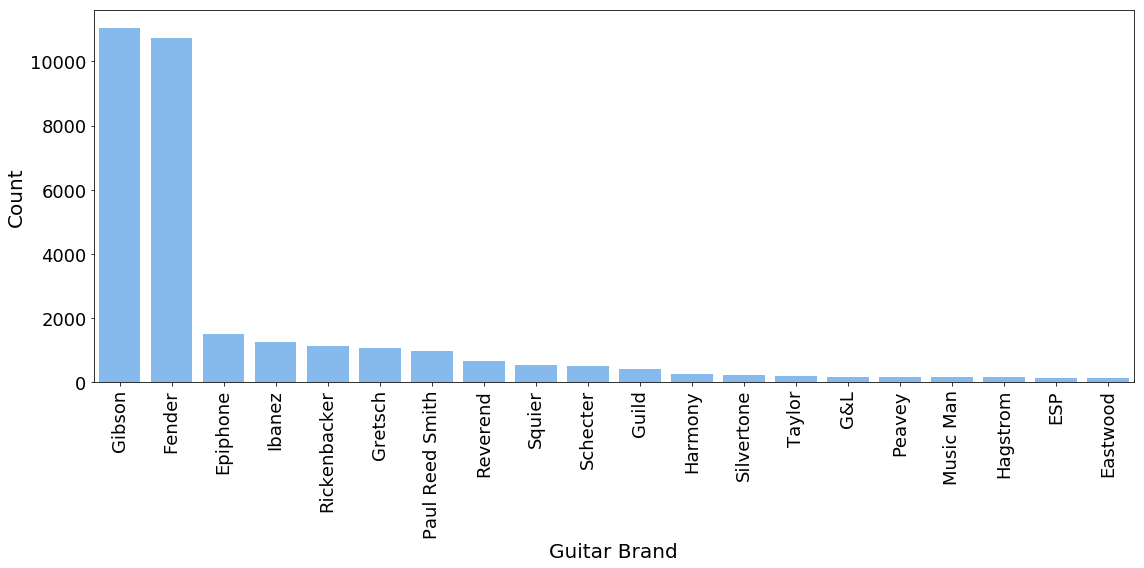

In [11]:
# Brand Count vs. Brand
dims = (16.0,8.0)
fig, ax = plt.subplots(figsize=dims)
order = df['Brand'].value_counts().index
sns.countplot(x = 'Brand', data = df, order = order, ax = ax, color = '#75bbfd')
plt.xticks(rotation = 90)
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.xlabel('Guitar Brand')
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('Guitar Brand Countplot.png')
plt.show()

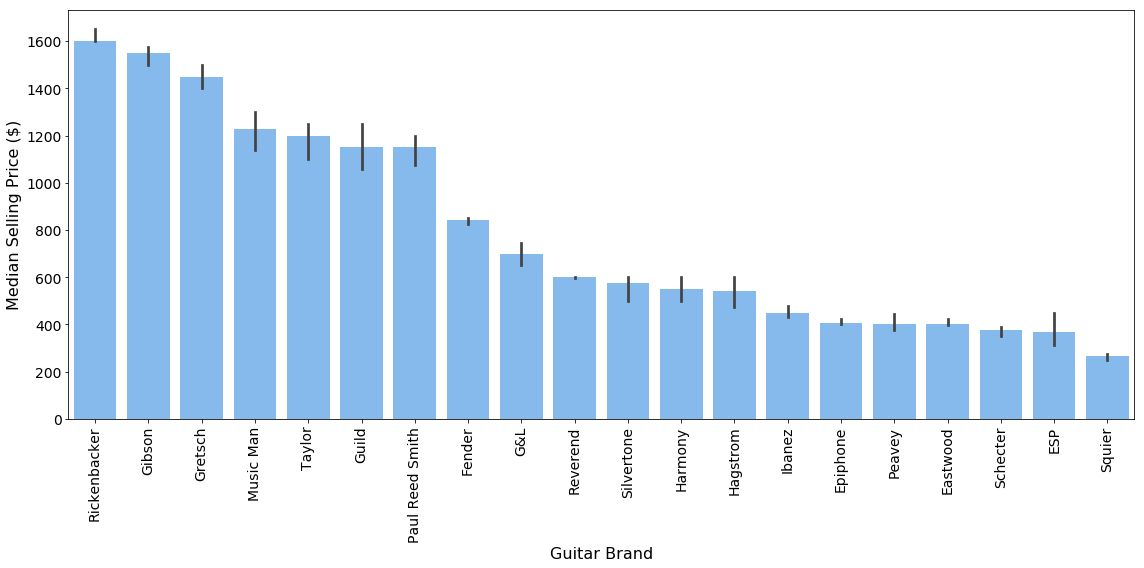

In [12]:
# Guitar Selling Price (Median) vs. Brand
dims = (16.0,8.0)
fig, ax = plt.subplots(figsize=dims)
order = list(df.groupby('Brand')['Final'].median().reset_index().sort_values('Final', ascending = False)['Brand'])
sns.barplot(x = 'Brand', y = 'Final', data = df, estimator = np.median, order = order, ax = ax, color = '#75bbfd')
plt.xticks(rotation = 90)
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.xlabel('Guitar Brand')
plt.ylabel('Median Selling Price ($)')
plt.tight_layout()
#plt.savefig('Median Selling Price vs Brand.png')
plt.show()

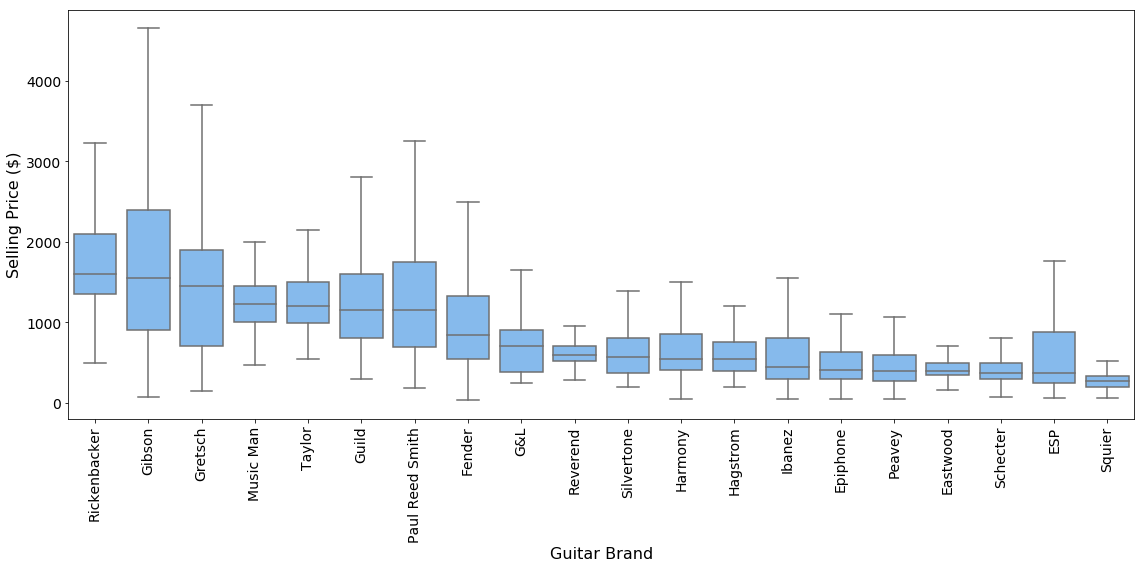

In [31]:
# Guitar Selling Price (Median) vs. Brand
dims = (16.0,8.0)
fig, ax = plt.subplots(figsize=dims)
order = list(df.groupby('Brand')['Final'].median().reset_index().sort_values('Final', ascending = False)['Brand'])
sns.boxplot(x = 'Brand', y = 'Final', data = df, order = order, ax = ax, color = '#75bbfd', showfliers = False)
plt.xticks(rotation = 90)
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.xlabel('Guitar Brand')
plt.ylabel('Selling Price ($)')
plt.tight_layout()
plt.savefig('Boxplot Selling Price vs Brand No Outliers.png')
plt.show()

# Condition (x) Visualizations

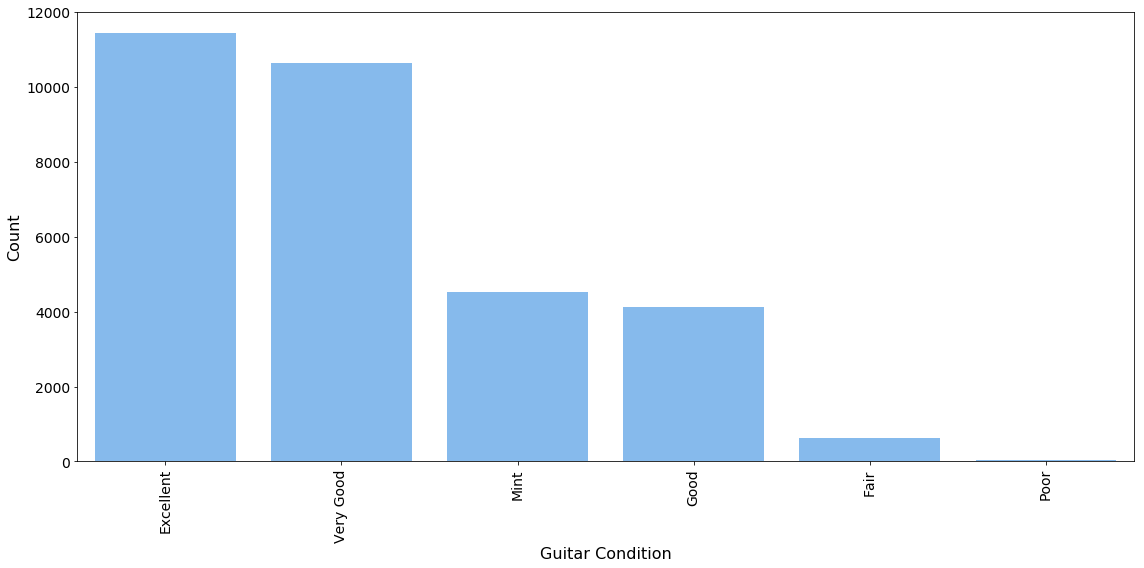

In [14]:
# Condition count vs. Condition
dims = (16.0,8.0)
fig, ax = plt.subplots(figsize=dims)
order = df['Condition'].value_counts().index
sns.countplot(x = 'Condition', data = df, order = order, ax = ax, color = '#75bbfd')
plt.xticks(rotation = 90)
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.xlabel('Guitar Condition')
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('Guitar Condition Countplot.png')
plt.show()

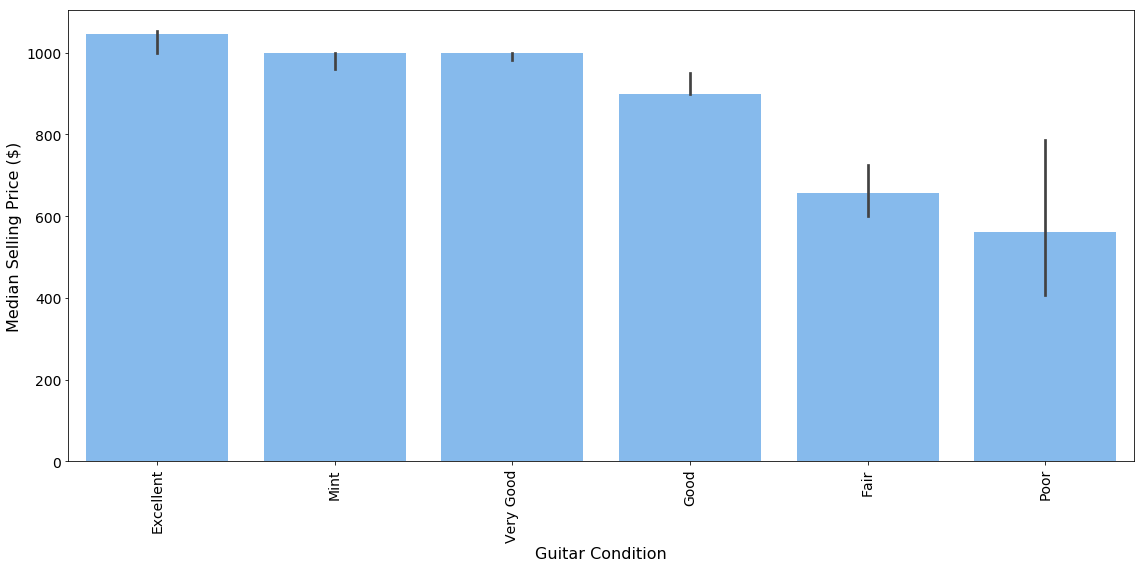

In [15]:
# Guitar Selling Price (Median) vs. Condition
dims = (16.0,8.0)
fig, ax = plt.subplots(figsize=dims)
order = list(df.groupby('Condition')['Final'].median().reset_index().sort_values('Final', ascending = False)['Condition'])
sns.barplot(x = 'Condition', y = 'Final', data = df, estimator = np.median, order = order, ax = ax, color = '#75bbfd')
plt.xticks(rotation = 90)
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.xlabel('Guitar Condition')
plt.ylabel('Median Selling Price ($)')
plt.tight_layout()
#plt.savefig('Median Selling Price vs. Guitar Condition.png')
plt.show()

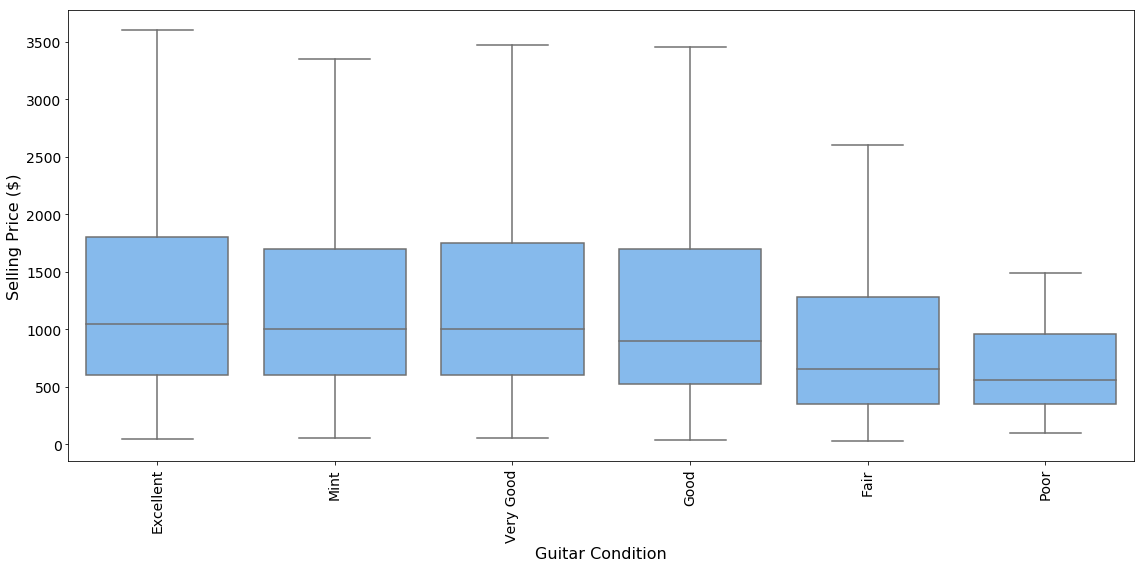

In [32]:
# Guitar Selling Price (Median) vs. Brand
dims = (16.0,8.0)
fig, ax = plt.subplots(figsize=dims)
order = list(df.groupby('Condition')['Final'].median().reset_index().sort_values('Final', ascending = False)['Condition'])
sns.boxplot(x = 'Condition', y = 'Final', data = df, order = order, ax = ax, color = '#75bbfd', showfliers = False)
plt.xticks(rotation = 90)
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.xlabel('Guitar Condition')
plt.ylabel('Selling Price ($)')
plt.tight_layout()
#plt.ylim(0, 3700)
plt.savefig('Boxplot Selling Price vs Guitar Condition No Outliers.png')
plt.show()

# Color (x) Visualizations

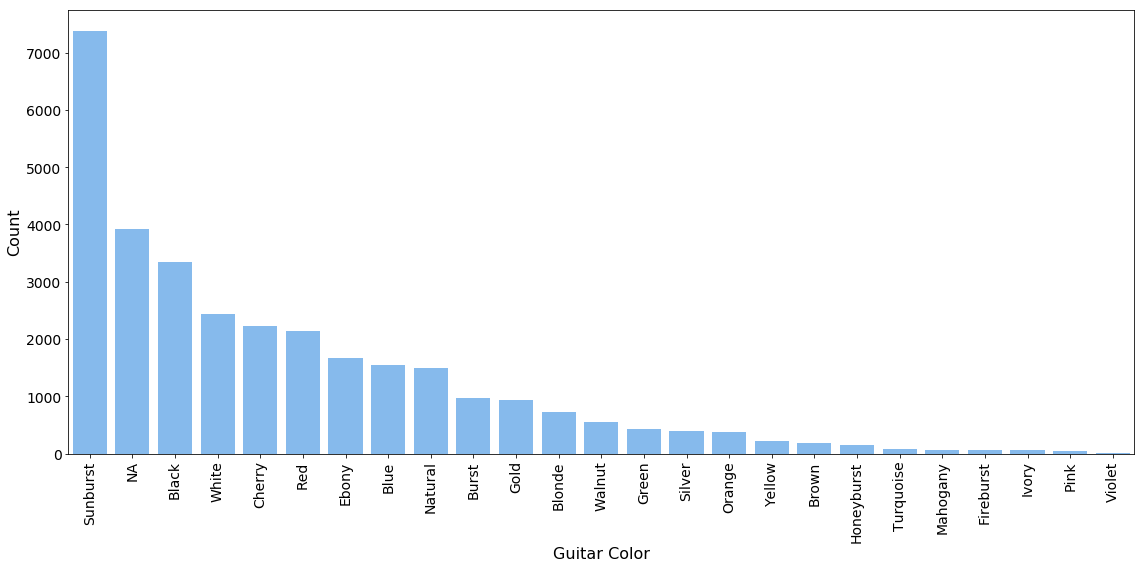

In [17]:
# Color count vs. Color
dims = (16.0,8.0)
fig, ax = plt.subplots(figsize=dims)
order = df['Model Color'].value_counts().index
sns.countplot(x = 'Model Color', data = df, order = order, ax = ax, color = '#75bbfd')
plt.xticks(rotation = 90)
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.xlabel('Guitar Color')
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('Guitar Color Counts.png')
plt.show()

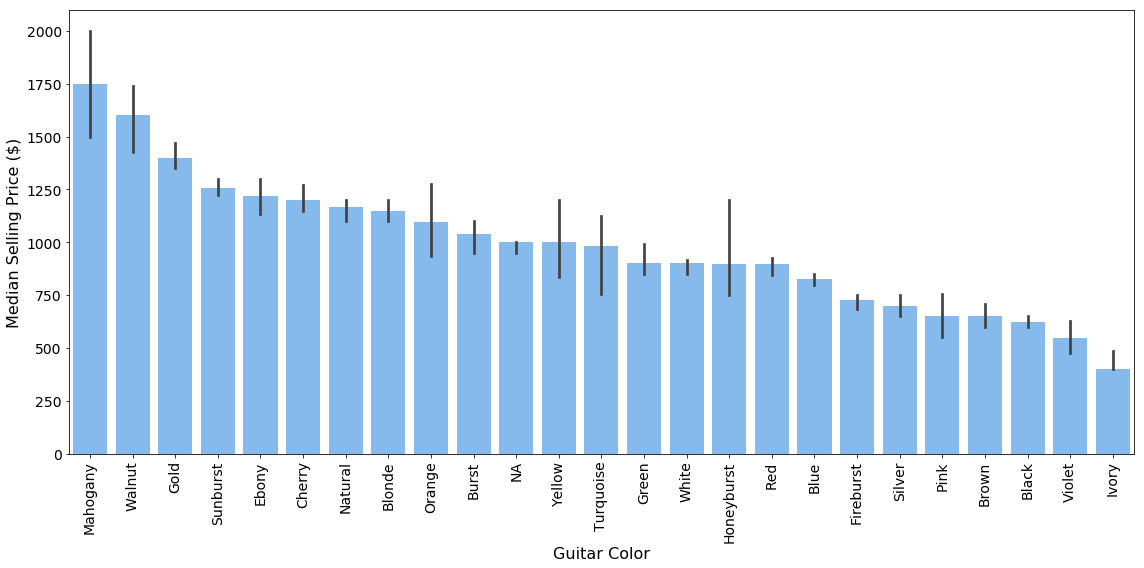

In [18]:
# Guitar Selling Price (Median) vs. Condition
dims = (16.0,8.0)
fig, ax = plt.subplots(figsize=dims)
order = list(df.groupby('Model Color')['Final'].median().reset_index().sort_values('Final', ascending = False)['Model Color'])
sns.barplot(x = 'Model Color', y = 'Final', data = df, estimator = np.median, order = order, ax = ax, color = '#75bbfd')
plt.xticks(rotation = 90)
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.xlabel('Guitar Color')
plt.ylabel('Median Selling Price ($)')
plt.tight_layout()
#plt.savefig('Median Selling Price vs. Model Color.png')
plt.show()

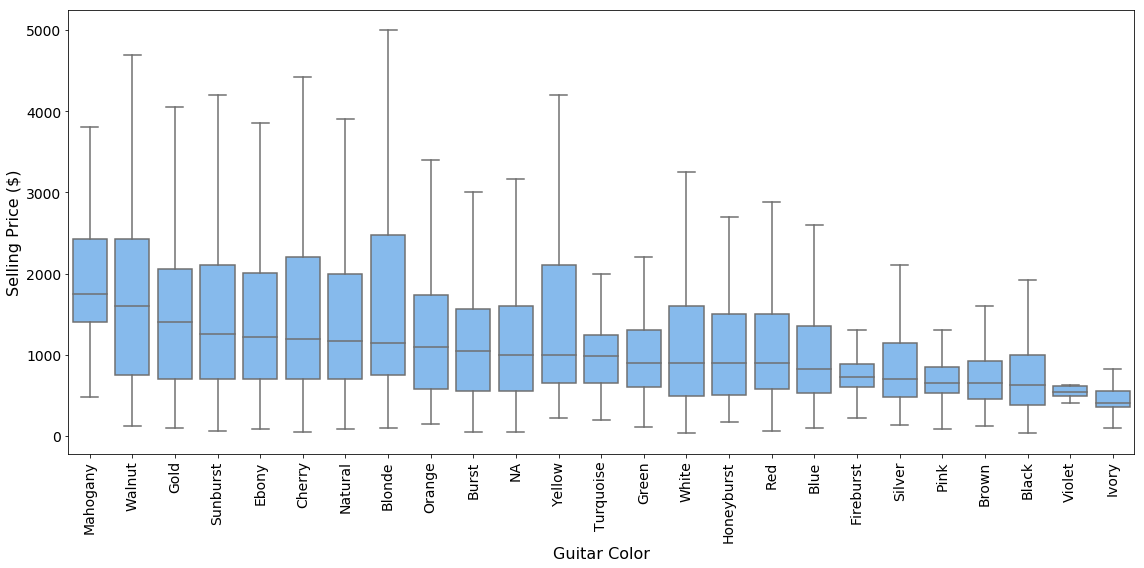

In [34]:
# Guitar Selling Price (Median) vs. Brand
dims = (16.0,8.0)
fig, ax = plt.subplots(figsize=dims)
order = list(df.groupby('Model Color')['Final'].median().reset_index().sort_values('Final', ascending = False)['Model Color'])
sns.boxplot(x = 'Model Color', y = 'Final', data = df, order = order, ax = ax, color = '#75bbfd', showfliers = False)
plt.xticks(rotation = 90)
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.xlabel('Guitar Color')
plt.ylabel('Selling Price ($)')
plt.tight_layout()
plt.savefig('Boxplot Selling Price vs Guitar Color No Outliers.png')
plt.show()